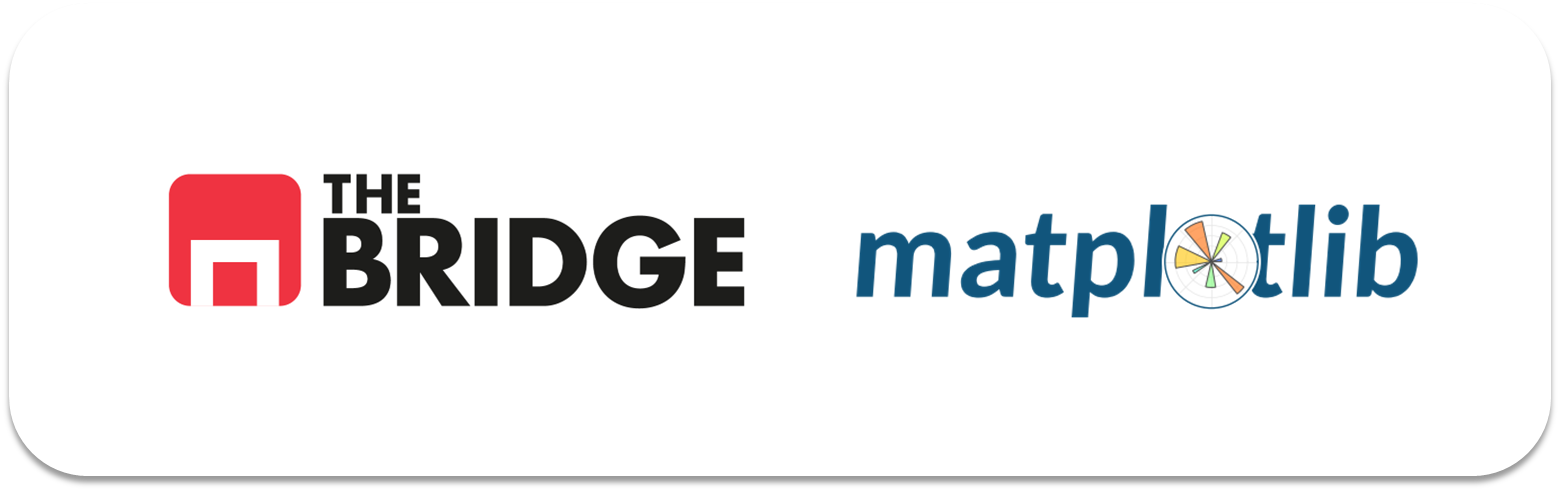

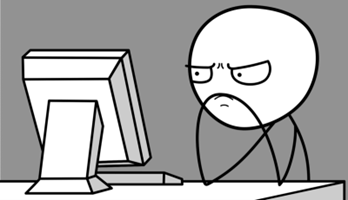

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Ejercicio 1


Carga tu qerido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [3]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df_titanic.drop(["embarked","survived","pclass"],axis=1,inplace=True)
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True


In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


In [7]:
del df_titanic["deck"]

In [9]:
df_titanic.loc[df_titanic["embark_town"].isna(),"embark_town"] = df_titanic["embark_town"].mode()[0]

In [10]:
df_titanic.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [22]:
lista = ["man","woman","child"]
for i in lista:
    df_titanic.loc[(df_titanic["who"]==i) & (df_titanic["age"].isna()),"age"] = df_titanic.loc[df_titanic["who"]==i,"age"].mean()

In [23]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          891 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  891 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

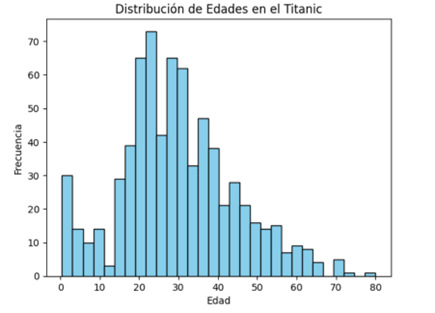

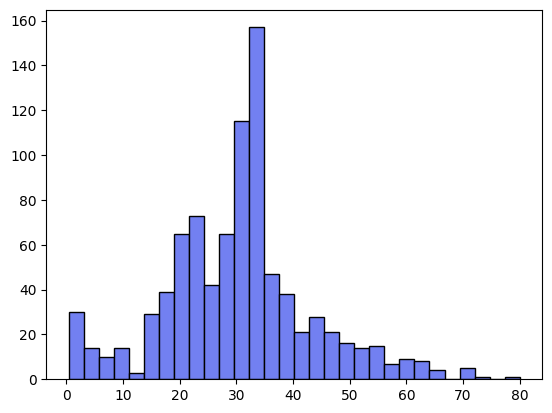

In [35]:
limite = plt.hist(df_titanic["age"],bins=30,alpha=1,color="#7280f1",edgecolor="k");

### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

In [53]:
num_viajeros = limite[0]
intervalos = limite[1]
#buscar los 3 valores mas altos de num_viajeros
indices = np.argsort(num_viajeros)[-3:]
indices
#Aqui ya podemos obtener lo que queremos:
print(f"Los valores {num_viajeros[indices]} estan en los intervalos {intervalos[indices]}")

Los valores [ 73. 115. 157.] estan en los intervalos [21.64133333 29.59933333 32.252     ]


### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

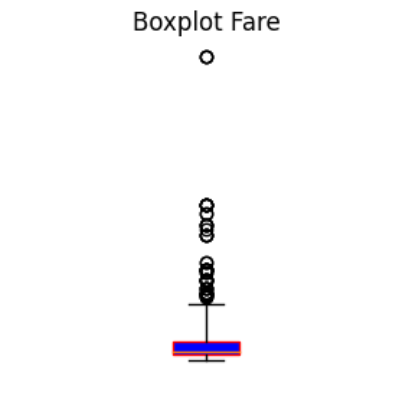

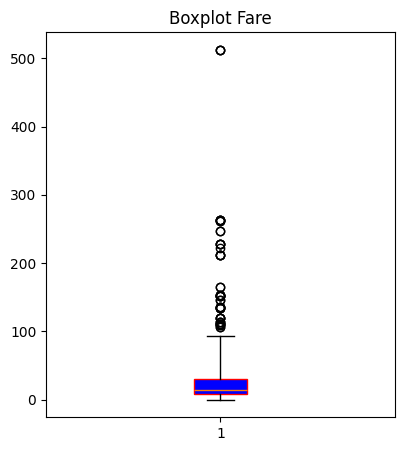

In [84]:
fig = plt.figure(figsize=(4.5,5))
plt.boxplot(df_titanic["fare"],whis=3,boxprops=dict(facecolor="b",color="r"),patch_artist=True)
plt.title("Boxplot Fare");

### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

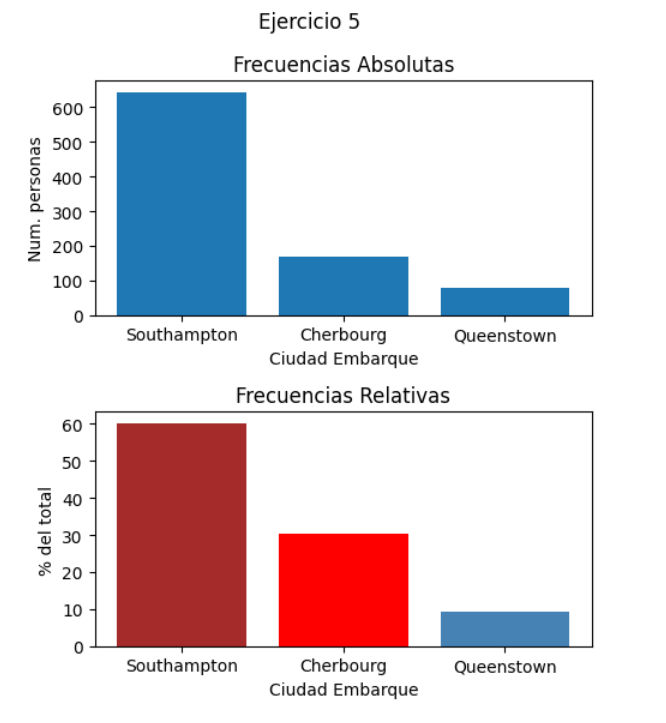

Text(0, 0.5, 'Porcentaje del total')

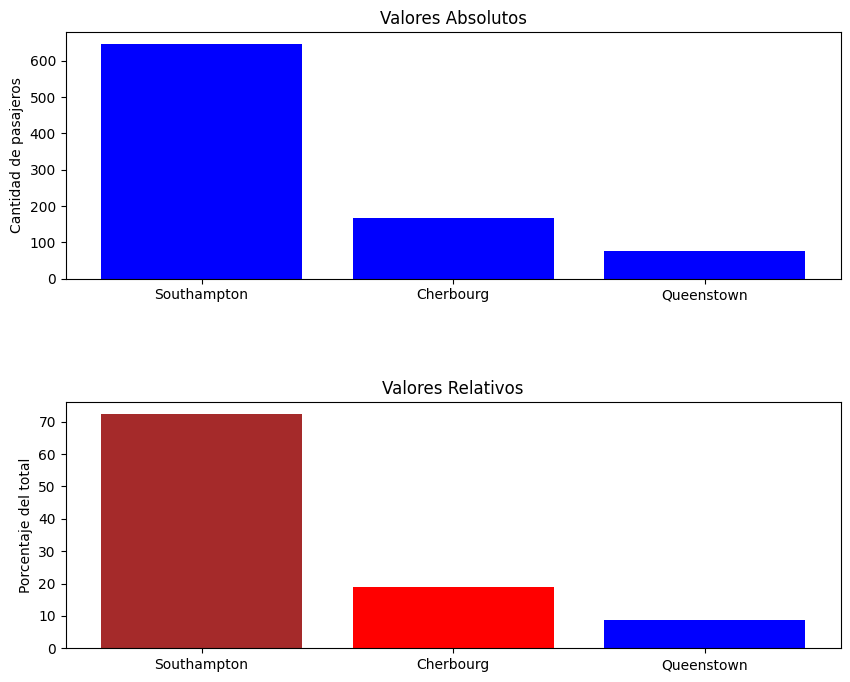

In [100]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
fig.subplots_adjust(hspace=0.5)
categoria = df_titanic["embark_town"].value_counts().index.to_list()
valores_absolutos = df_titanic["embark_town"].value_counts().to_list()
valores_relativos = (df_titanic["embark_town"].value_counts(normalize=True)*100).to_list()
ax[0].bar(categoria,valores_absolutos,color="b")
ax[0].set_title("Valores Absolutos")
ax[0].set_ylabel("Cantidad de pasajeros")
ax[1].bar(categoria,valores_relativos,color = ["brown","red","blue"])
ax[1].set_title("Valores Relativos")
ax[1].set_ylabel("Porcentaje del total")


In [89]:
categoria

['Southampton', 'Cherbourg', 'Queenstown']

In [91]:
valores_relativos

[72.50280583613917, 18.855218855218855, 8.641975308641975]

### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpa)

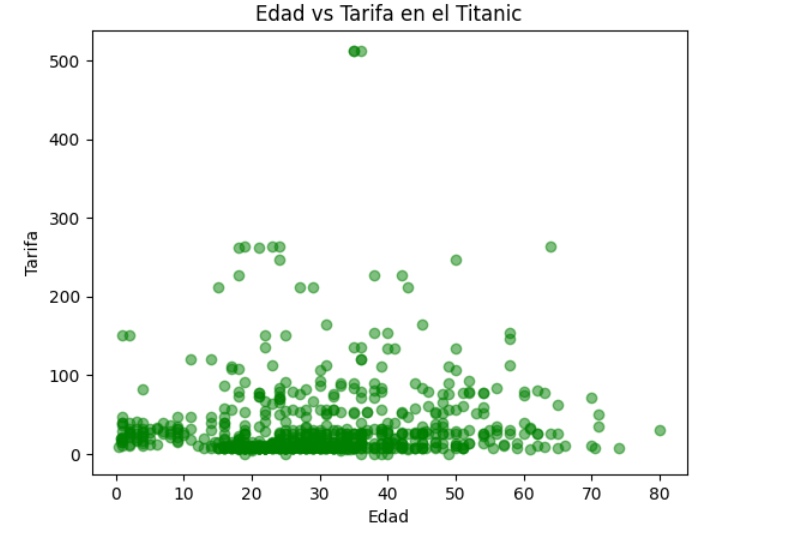

Text(0.5, 0, 'Edad')

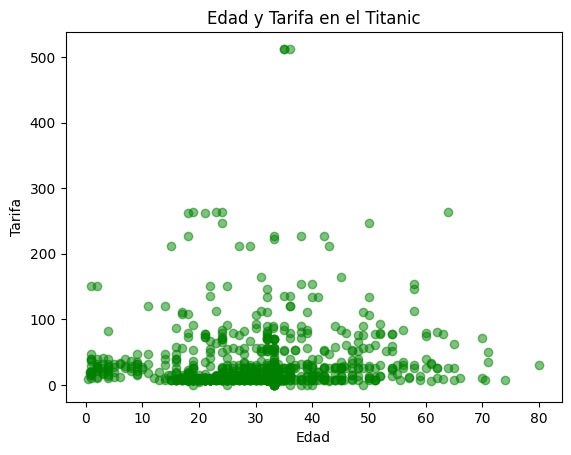

In [105]:
plt.scatter(df_titanic["age"],df_titanic["fare"],c="g",alpha=0.5)
plt.title("Edad y Tarifa en el Titanic")
plt.ylabel("Tarifa")
plt.xlabel("Edad")

### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [113]:
precio_medio_edad = df_titanic.groupby("age")["fare"].mean()
precio_desvio_edad = df_titanic.groupby("age")["fare"].std()

### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

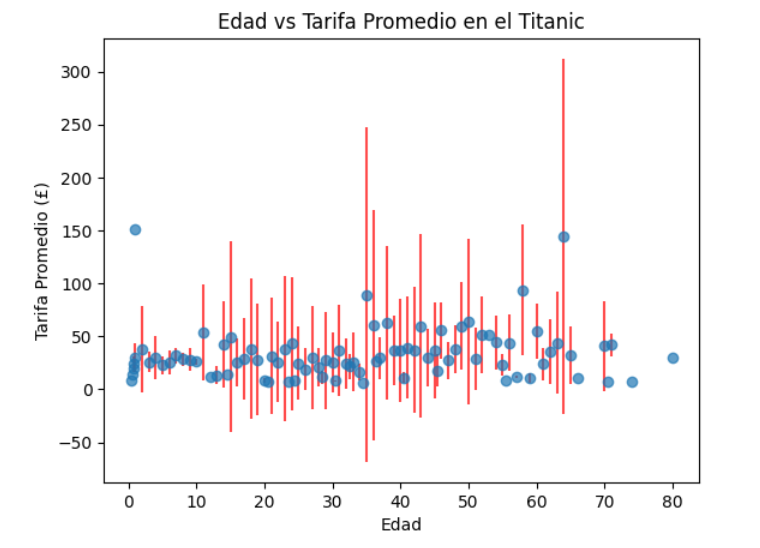

Text(0.5, 0, 'Edad')

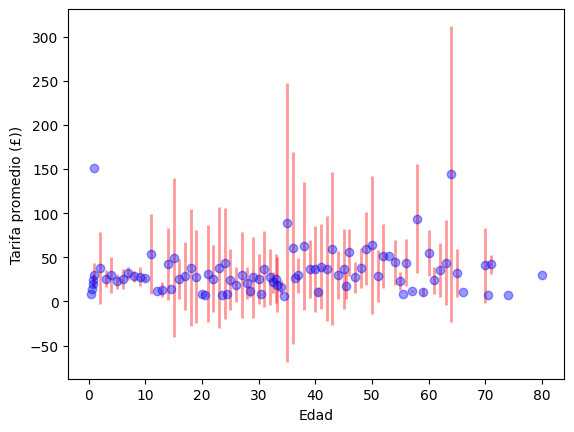

In [118]:
plt.errorbar(precio_medio_edad.index,precio_medio_edad,yerr=precio_desvio_edad,fmt="o",color="b",ecolor="r",alpha=0.4,elinewidth=2)
plt.ylabel("Tarifa promedio (£))")
plt.xlabel("Edad")

EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

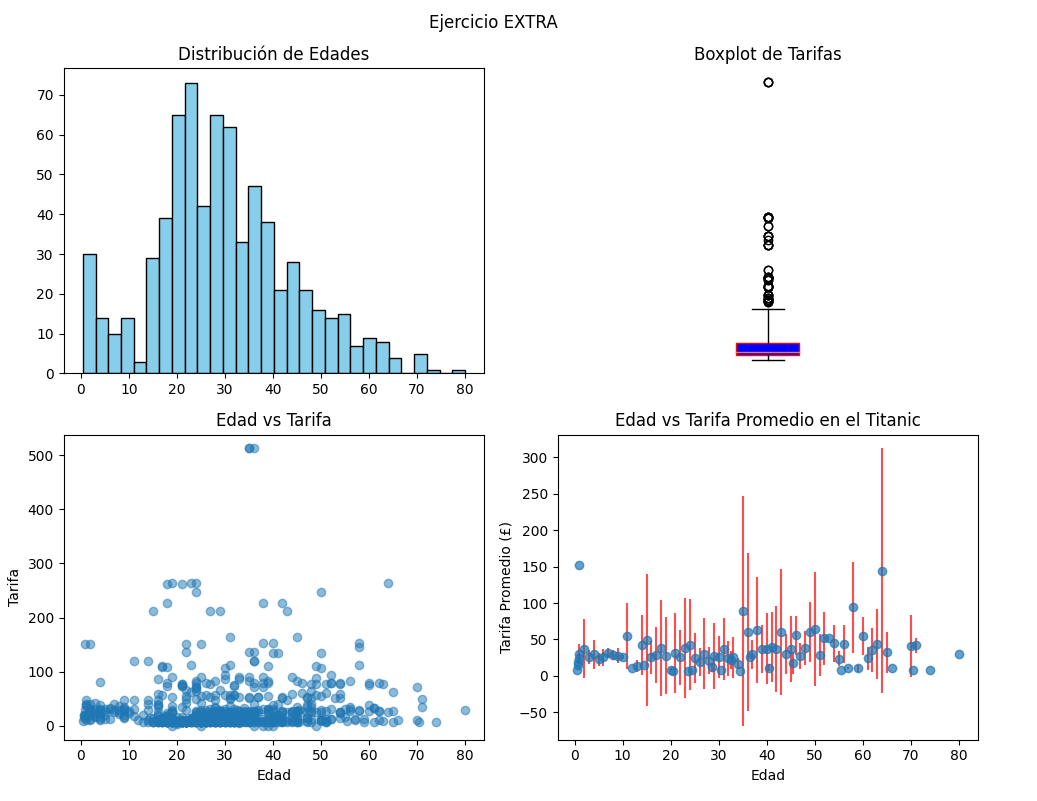

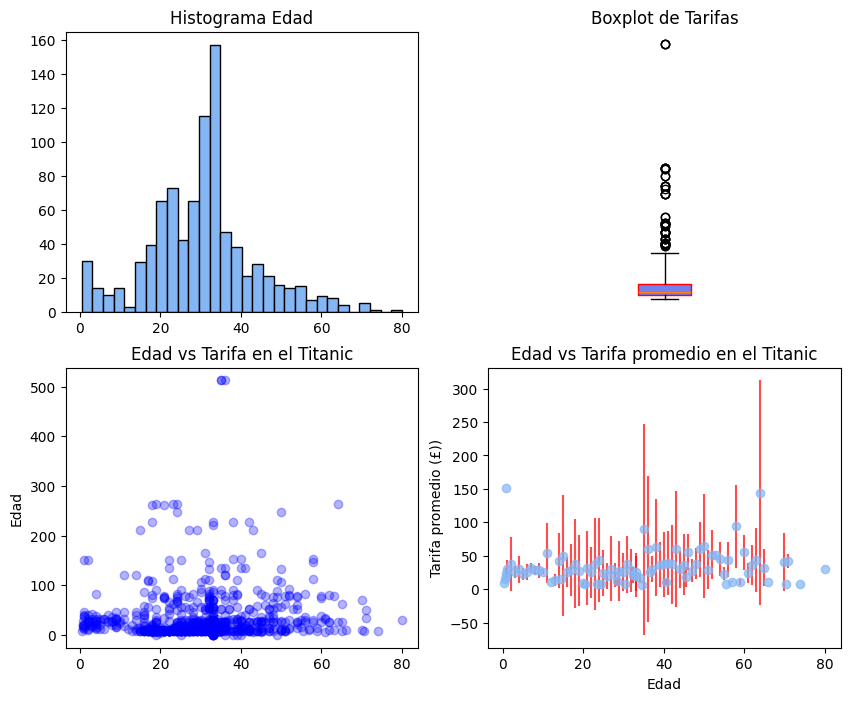

In [135]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
color = ["#7280f1","#84b6f4"]
ax[0,0].hist(df_titanic["age"],bins=30,alpha=1,color=color[1],edgecolor="k")
ax[0,0].set_title("Histograma Edad")

ax[0,1].boxplot(df_titanic["fare"],whis=3,boxprops =dict(facecolor=color[0],color="r"),patch_artist=True)
ax[0,1].set_title("Boxplot de Tarifas")
ax[0,1].axis("off")

ax[1,0].scatter(df_titanic["age"],df_titanic["fare"],c="b",alpha=0.3)
ax[1,0].set_title("Edad vs Tarifa en el Titanic")
ax[1,0].set_ylabel("Tarifa")
ax[1,0].set_ylabel("Edad")

ax[1,1].errorbar(precio_medio_edad.index,precio_medio_edad,yerr=precio_desvio_edad,fmt="o",color=color[1],ecolor="r",alpha=0.7)
ax[1,1].set_title("Edad vs Tarifa promedio en el Titanic")
ax[1,1].set_ylabel("Tarifa promedio (£))")
ax[1,1].set_xlabel("Edad");
